<a href="https://colab.research.google.com/github/BandiSriLakshmi/Question-Similarity-prediction/blob/main/Question_Similarity_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Improting all the useful libraries and functions that are essential**

**Pandas** : It provides dataframes for handling structured data.

**Numpy** :It supports numerical computations with arrays and matrices.

//**Visualization**

**Matplotlib.pyplot**:Used for data visualization like line plotting and histograms etc.

**seaborn** : enhances visualizations.

//**ML Tools**

**train_test_split** : splits data into training and testing sets for model evaluation.

**TfidfVectorizer** : converts text into numerical features using TF_IDF(Term frequency-inverse Document Frequency)

**LogisticRegression** : predicts class probabilities.

**accuracy_score** :evaluates model performance.

**confusion_matrix** : assesses classfication errors.

**classification_report** : detailed performance metrics for each class.

**Pipeline** : simplifies code and avoids data leakage.

//**NLP**

**stopwords** : removed to focus on meaningful words in NLP tasks.

**PorterStemmer** : normalizes text for better feature extraction.

**nltk** : a library for NLP tasks. provides tools for text preprocessing.

**re** : cleans text i.e remove punctuations, urls etc.

**string** : helps in text cleaning i.e string punctuation.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
import re
import string

In [ ]:
# Load the dataset
df = pd.read_csv('/content/questions.csv')

In [ ]:
# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB
None
   id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_

In [ ]:
# Check for null values in each column
print(df.isnull().sum())

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64


In [ ]:
import nltk
nltk.download('stopwords')
def preprocess_text(text):
    # Handle missing values: If text is NaN, return an empty string
    if pd.isnull(text):
        return ''
        # 1. Convert to lowercase
        text = text.lower()
        # 2. Remove URLs
        text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
        # 3. Remove punctuation
        text = "".join([char for char in text if char not in string.punctuation])
        # 4. Remove numbers
        text = re.sub(r'\d+', '', text)
        # 5. Remove stop words
        text = " ".join([word for word in text.split() if word not in stopwords.words("english")])
        # 6. Stemming
        stemmer = PorterStemmer()
        text = " ".join([stemmer.stem(word) for word in text.split()])
        return text
# Fill NaN values in 'question1' and 'question2' with empty strings
df['question1'] = df['question1'].fillna('')
df['question2'] = df['question2'].fillna('')
# Apply preprocessing to 'question1' and 'question2' columns
df['question1'] = df['question1'].apply(preprocess_text)
df['question2'] = df['question2'].apply(preprocess_text)
print(df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   id  qid1  qid2 question1 question2  is_duplicate
0   0     1     2      None      None             0
1   1     3     4      None      None             0
2   2     5     6      None      None             0
3   3     7     8      None      None             0
4   4     9    10      None      None             0


In [ ]:
# Check for null values in each column
print(df.isnull().sum())

id                   0
qid1                 0
qid2                 0
question1       404351
question2       404351
is_duplicate         0
dtype: int64


In [ ]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
# Preprocess 'question1' and 'question2' columns
df['processed_q1'] = df['question1'].apply(preprocess_text)
df['processed_q2'] = df['question2'].apply(preprocess_text)
# Now you can call create_features
def create_features(df):
# Jaccard similarity with handling for ZeroDivisionError
    df['jaccard_sim'] = df.apply(lambda x: len(set(x['processed_q1'].split()) & set(x['processed_q2'].split())) /
                            (len(set(x['processed_q1'].split()) | set(x['processed_q2'].split())) or 1),
                                    axis=1)  # Use 'or 1' to avoid division by zero
    return df

In [ ]:
# Combine questions for TF-IDF
questions = list(df['processed_q1']) + list(df['processed_q2'])
tfidf = TfidfVectorizer(max_features=3000)
tfidf.fit(questions)
# Transform questions to TF-IDF vectors
q1_tfidf = tfidf.transform(df['processed_q1'])
q2_tfidf = tfidf.transform(df['processed_q2'])
def create_features(df):
    # Calculate word count difference
    df['word_count_diff'] = df.apply(lambda x: abs(len(x['processed_q1'].split()) - len(x['processed_q2'].split())), axis=1)
    # Calculate common words
    df['common_words'] = df.apply(lambda x: len(set(x['processed_q1'].split()) & set(x['processed_q2'].split())), axis=1)
   # Jaccard similarity with handling for ZeroDivisionError
    df['jaccard_sim'] = df.apply(lambda x: len(set(x['processed_q1'].split()) & set(x['processed_q2'].split())) /
                                    (len(set(x['processed_q1'].split()) | set(x['processed_q2'].split())) or 1),
                                    axis=1)  # Use 'or 1' to avoid division by zero
    return df
# Call create_features to add 'jaccard_sim', 'word_count_diff', and 'common_words' columns
df = create_features(df)  # This should be called before creating X

# Now create feature vectors by combining TF-IDF and engineered features
from scipy.sparse import hstack

X = hstack((q1_tfidf, q2_tfidf,
            np.array(df['word_count_diff']).reshape(-1, 1),
            np.array(df['common_words']).reshape(-1, 1),
            np.array(df['jaccard_sim']).reshape(-1, 1)))

y = df['is_duplicate']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [ ]:
import nltk
nltk.download('stopwords')

def preprocess_text(text):
    # Handle missing values: If text is NaN, return an empty string
    if pd.isnull(text):
        return ''

    # 1. Convert to lowercase
    text = text.lower()
    # 2. Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # 3. Remove punctuation
    text = "".join([char for char in text if char not in string.punctuation])
    # 4. Remove numbers
    text = re.sub(r'\d+', '', text)
    # 5. Remove stop words
    # Updated stop word removal to keep some words that might be important
    stop_words = set(stopwords.words("english")) - {'not', 'no', 'can', 'cannot', 'could', 'would', 'should', 'might', 'must'}
    text = " ".join([word for word in text.split() if word not in stop_words])
    # 6. Stemming
    stemmer = PorterStemmer()
    text = " ".join([stemmer.stem(word) for word in text.split()])

    return text

# ... (Rest of your code remains the same)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
import re
import string
from scipy.sparse import hstack

# Download stopwords if not already downloaded
nltk.download('stopwords')

def preprocess_text(text):
    # Handle missing values: If text is NaN, return an empty string
    if pd.isnull(text):
        return ''

    # 1. Convert to lowercase
    text = text.lower()
    # 2. Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # 3. Remove punctuation
    text = "".join([char for char in text if char not in string.punctuation])
    # 4. Remove numbers
    text = re.sub(r'\d+', '', text)
    # 5. Remove stop words
    # Updated stop word removal to keep some words that might be important
    stop_words = set(stopwords.words("english")) - {'not', 'no', 'can', 'cannot', 'could', 'would', 'should', 'might', 'must'}
    text = " ".join([word for word in text.split() if word not in stop_words])
    # 6. Stemming
    stemmer = PorterStemmer()
    text = " ".join([stemmer.stem(word) for word in text.split()])

    return text

# Load the dataset
df = pd.read_csv('/content/questions.csv')

# Fill NaN values in 'question1' and 'question2' with empty strings
df['question1'] = df['question1'].fillna('')
df['question2'] = df['question2'].fillna('')

# Apply preprocessing to 'question1' and 'question2' columns
df['question1'] = df['question1'].apply(preprocess_text)
df['question2'] = df['question2'].apply(preprocess_text)

# Create new columns for processed questions
df['processed_q1'] = df['question1']
df['processed_q2'] = df['question2']

def create_features(df):
    # Calculate word count difference
    df['word_count_diff'] = df.apply(lambda x: abs(len(x['processed_q1'].split()) - len(x['processed_q2'].split())), axis=1)
    # Calculate common words
    df['common_words'] = df.apply(lambda x: len(set(x['processed_q1'].split()) & set(x['processed_q2'].split())), axis=1)
    # Jaccard similarity with handling for ZeroDivisionError
    df['jaccard_sim'] = df.apply(lambda x: len(set(x['processed_q1'].split()) & set(x['processed_q2'].split())) /
                                    (len(set(x['processed_q1'].split()) | set(x['processed_q2'].split())) or 1),
                                    axis=1)  # Use 'or 1' to avoid division by zero
    return df

# Call create_features to add features
df = create_features(df)

# Combine questions for TF-IDF
questions = list(df['processed_q1']) + list(df['processed_q2'])
tfidf = TfidfVectorizer(max_features=5000) # Increased max_features
tfidf.fit(questions)

# Transform questions to TF-IDF vectors
q1_tfidf = tfidf.transform(df['processed_q1'])
q2_tfidf = tfidf.transform(df['processed_q2'])

# Now create feature vectors by combining TF-IDF and engineered features
X = hstack((q1_tfidf, q2_tfidf,
            np.array(df['word_count_diff']).reshape(-1, 1),
            np.array(df['common_words']).reshape(-1, 1),
            np.array(df['jaccard_sim']).reshape(-1, 1)))

y = df['is_duplicate']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train logistic regression model
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Function to predict similarity
def predict_similarity(question1, question2):
    # Preprocess the questions
    q1_processed = preprocess_text(question1)
    q2_processed = preprocess_text(question2)

    # TF-IDF transformation
    q1_tfidf = tfidf.transform([q1_processed])
    q2_tfidf = tfidf.transform([q2_processed])

    # Create features
    word_count_diff = abs(len(q1_processed.split()) - len(q2_processed.split()))
    common_words = len(set(q1_processed.split()) & set(q2_processed.split()))
    jaccard_sim = common_words / (len(set(q1_processed.split()) | set(q2_processed.split())) or 1) # Avoiding division by zero

    # Combine features
    features = hstack((q1_tfidf, q2_tfidf,
                      np.array([word_count_diff]).reshape(-1, 1),
                      np.array([common_words]).reshape(-1, 1),
                      np.array([jaccard_sim]).reshape(-1, 1)))

    # Predict
    prediction = model.predict(features)[0]

    return "Similar" if prediction == 1 else "Not Similar"

# Example usage
question1 = "What is the capital of France?"
question2 = "Which city is the capital of France?"

result = predict_similarity(question1, question2)
print(f"\nQuestion 1: {question1}")
print(f"Question 2: {question2}")
print(f"Prediction: {result}")

# ... (Other examples)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.7715992135623401

Confusion Matrix:
 [[39224 11786]
 [ 6685 23176]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81     51010
           1       0.66      0.78      0.72     29861

    accuracy                           0.77     80871
   macro avg       0.76      0.77      0.76     80871
weighted avg       0.78      0.77      0.77     80871


Question 1: What is the capital of France?
Question 2: Which city is the capital of France?
Prediction: Not Similar


In [ ]:
# Initialize and train logistic regression model
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7715992135623401

Confusion Matrix:
 [[39224 11786]
 [ 6685 23176]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81     51010
           1       0.66      0.78      0.72     29861

    accuracy                           0.77     80871
   macro avg       0.76      0.77      0.76     80871
weighted avg       0.78      0.77      0.77     80871



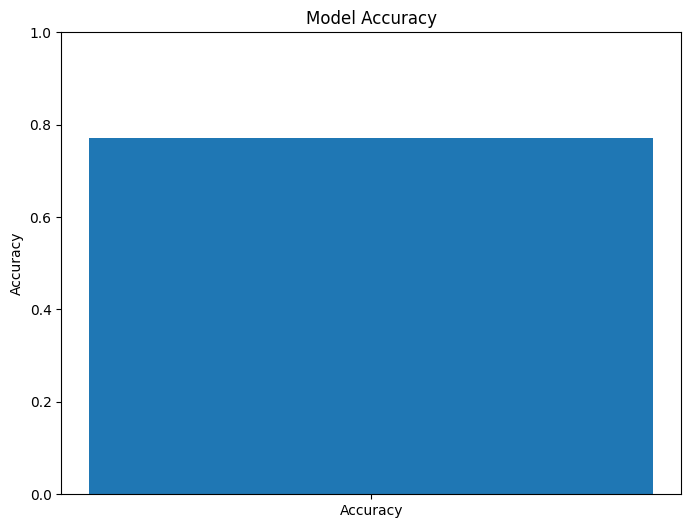

In [ ]:
# Assuming 'accuracy_score(y_test, y_pred)' from the previous code is stored in a variable
accuracy = accuracy_score(y_test, y_pred)

# Plotting the accuracy
plt.figure(figsize=(8, 6))
plt.bar(['Accuracy'], [accuracy])
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression # Import LinearRegression

model = LinearRegression() # Initialize the model
model.fit(X_train, y_train) # Train the model

# Predict on test set
y_pred = model.predict(X_test)

# Since Linear Regression predicts continuous values, we need to convert them to binary (0 or 1)
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred_binary))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))
print("\nClassification Report:\n", classification_report(y_test, y_pred_binary))

Accuracy: 0.7752964597939929

Confusion Matrix:
 [[43615  7395]
 [10777 19084]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83     51010
           1       0.72      0.64      0.68     29861

    accuracy                           0.78     80871
   macro avg       0.76      0.75      0.75     80871
weighted avg       0.77      0.78      0.77     80871



Accuracy: 0.8258337352079237

Confusion Matrix:
 [[44303  6695]
 [ 7390 22483]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86     50998
           1       0.77      0.75      0.76     29873

    accuracy                           0.83     80871
   macro avg       0.81      0.81      0.81     80871
weighted avg       0.83      0.83      0.83     80871



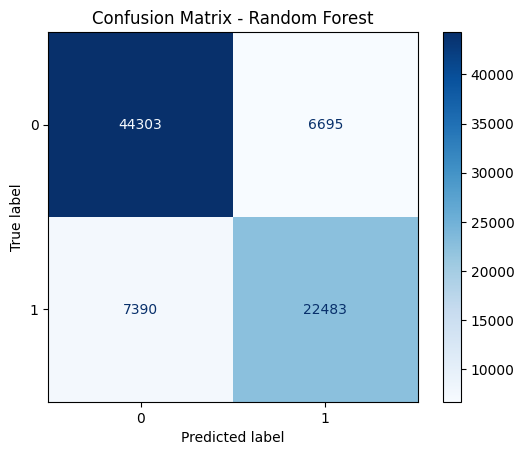

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Example: Replace this with your actual dataset
# X = features, y = labels
# For demonstration, assuming X and y are already prepared
# X = df.drop('target', axis=1)
# y = df['target']

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()



In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for positive class
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



AttributeError: 'LinearRegression' object has no attribute 'predict_proba'

In [ ]:
def predict_similarity(question1, question2):
    # Preprocess the questions
    q1_processed = preprocess_text(question1)
    q2_processed = preprocess_text(question2)

    # TF-IDF transformation
    q1_tfidf = tfidf.transform([q1_processed])
    q2_tfidf = tfidf.transform([q2_processed])

    # Create features
    word_count_q1 = len(q1_processed.split())
    word_count_q2 = len(q2_processed.split())
    word_count_diff = abs(word_count_q1 - word_count_q2)

    common_words = len(set(q1_processed.split()) & set(q2_processed.split()))

    jaccard_sim = common_words / len(set(q1_processed.split()) | set(q2_processed.split()))

    # Combine features
    features = hstack((q1_tfidf, q2_tfidf,
                      np.array([word_count_diff]).reshape(-1, 1),
                      np.array([common_words]).reshape(-1, 1),
                      np.array([jaccard_sim]).reshape(-1, 1)))

    # Predict
    prediction = model.predict(features)[0]

    return "Similar" if prediction == 1 else "Not Similar"

In [ ]:
# Example questions
question1 = "What is the capital of France?"
question2 = "Which city is the capital of France?"

# Get prediction
result = predict_similarity(question1, question2)
print(f"\nQuestion 1: {question1}")
print(f"Question 2: {question2}")
print(f"Prediction: {result}")

# Another example
question3 = "How do I learn machine learning?"
question4 = "What's the weather like today?"

result = predict_similarity(question3, question4)
print(f"\nQuestion 1: {question3}")
print(f"Question 2: {question4}")
print(f"Prediction: {result}")


Question 1: What is the capital of France?
Question 2: Which city is the capital of France?
Prediction: Not Similar

Question 1: How do I learn machine learning?
Question 2: What's the weather like today?
Prediction: Not Similar


In [ ]:
# Example questions that should be predicted as similar
question5 = "What are the best programming languages to learn?"
question6 = "Which programming languages should I learn first?"

question7 = "How do I become a data scientist?"
question8 = "What is the path to becoming a data scientist?"


result = predict_similarity(question5, question6)
print(f"\nQuestion 1: {question5}")
print(f"Question 2: {question6}")
print(f"Prediction: {result}")

result = predict_similarity(question7, question8)
print(f"\nQuestion 1: {question7}")
print(f"Question 2: {question8}")
print(f"Prediction: {result}")



Question 1: What are the best programming languages to learn?
Question 2: Which programming languages should I learn first?
Prediction: Not Similar

Question 1: How do I become a data scientist?
Question 2: What is the path to becoming a data scientist?
Prediction: Not Similar


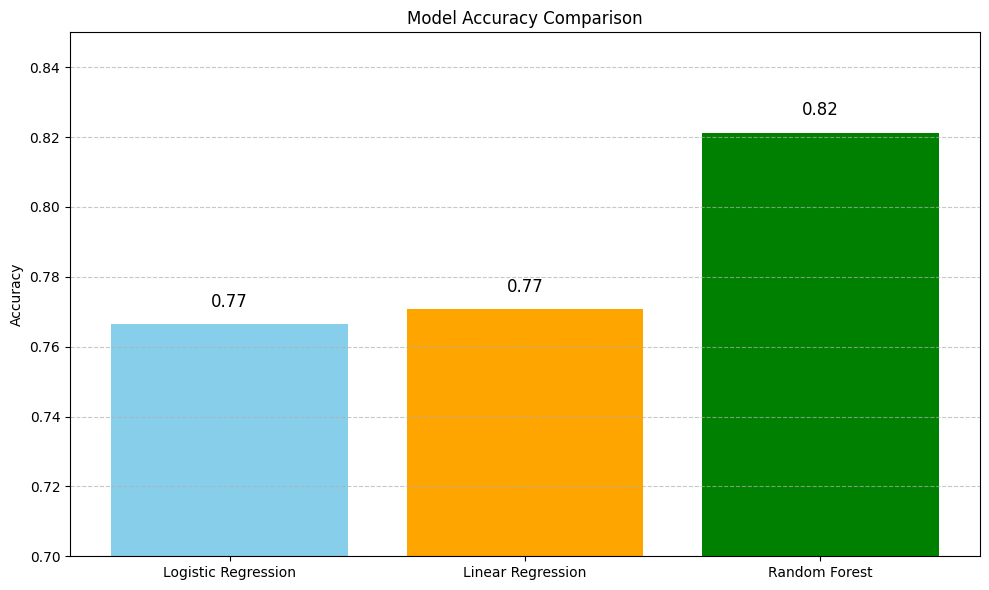

In [ ]:
import matplotlib.pyplot as plt

# Model names and their respective accuracies
models = ['Logistic Regression', 'Linear Regression', 'Random Forest']
accuracies = [0.7665, 0.7707, 0.8213]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['skyblue', 'orange', 'green'])
plt.ylim(0.7, 0.85)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Adding accuracy labels on top of each bar
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005,
             f'{acc:.2f}', ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


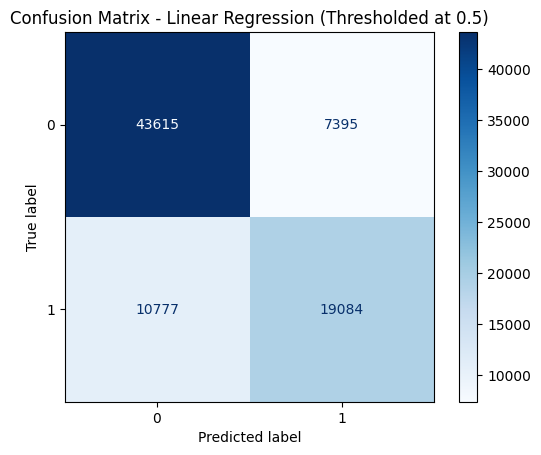

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Linear Regression (Thresholded at 0.5)")
plt.show()


Accuracy: 0.7715992135623401

Confusion Matrix:
 [[39224 11786]
 [ 6685 23176]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81     51010
           1       0.66      0.78      0.72     29861

    accuracy                           0.77     80871
   macro avg       0.76      0.77      0.76     80871
weighted avg       0.78      0.77      0.77     80871



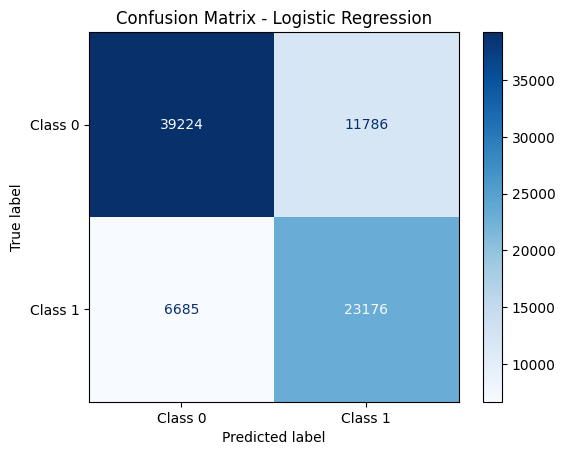

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Train Logistic Regression
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
